In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
from IPython.display import Image
from sklearn import tree
import pandas as pd
import numpy as nmp
import pydotplus

import matplotlib.pyplot as plt
%matplotlib inline

Загрузили данные "german.data-numeric", прочитали, составили табличку, с которой уже можно работать.
Описание признаков в отдельном файле.

In [59]:
doc = pd.read_csv('german.data-numeric', sep='\s+', header=None)
data = doc.iloc[:, :-1]
target = doc.iloc[:, -1]

print(data[:5])
print(target[:5])

   0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  20  21  \
0   1   6   4  12   5   5   3   4   1  67 ...   1   0   0   1   0   0   1   0   
1   2  48   2  60   1   3   2   2   1  22 ...   1   0   0   1   0   0   1   0   
2   4  12   4  21   1   4   3   3   1  49 ...   1   0   0   1   0   0   1   0   
3   1  42   2  79   1   4   3   4   2  45 ...   1   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53 ...   1   1   0   1   0   0   0   0   

   22  23  
0   0   1  
1   0   1  
2   1   0  
3   0   1  
4   0   1  

[5 rows x 24 columns]
0    1
1    2
2    1
3    1
4    2
Name: 24, dtype: int64


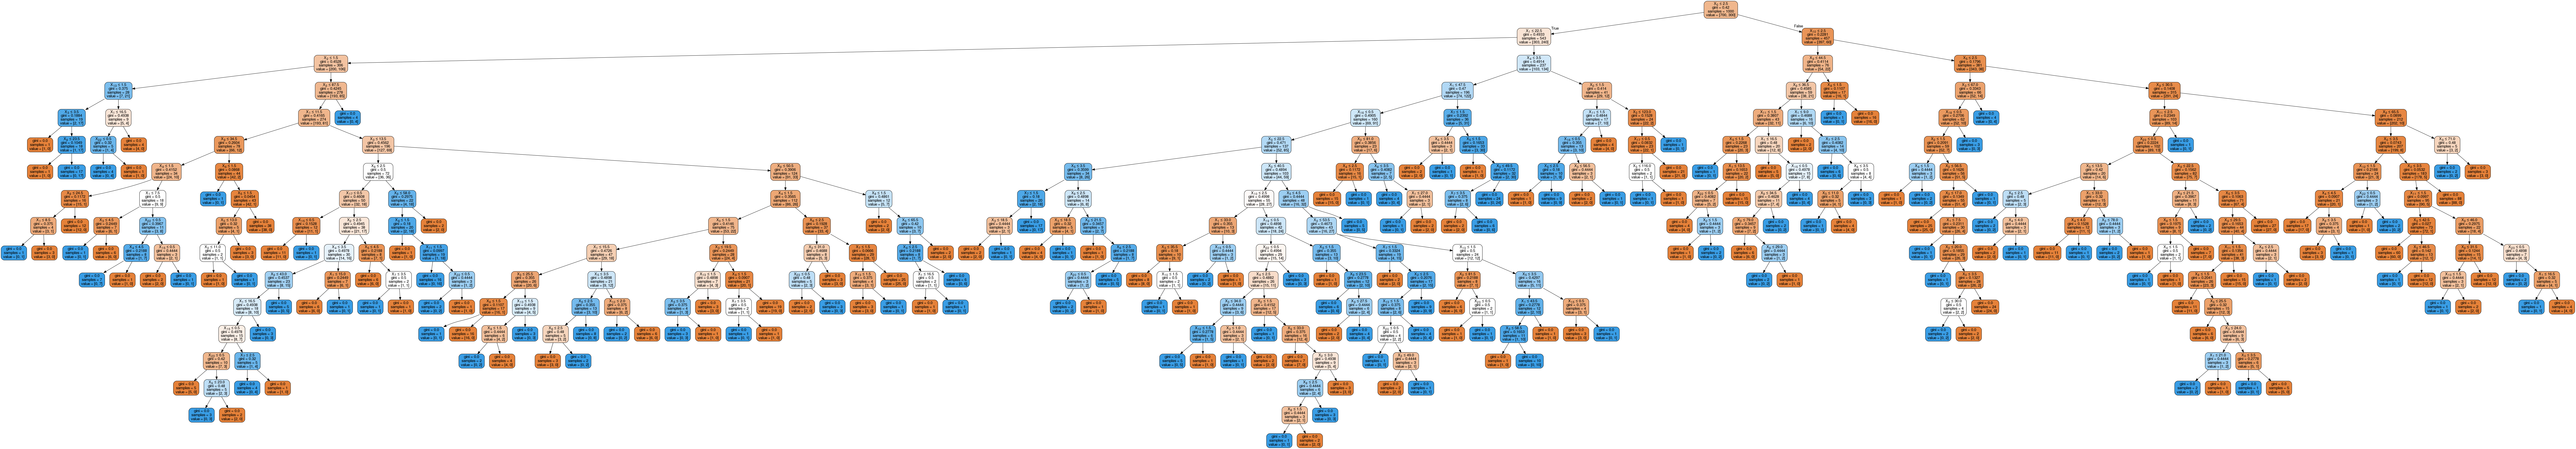

In [60]:
model = DTC()
model.fit(data, target)

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2)

dot_data = tree.export_graphviz(model, out_file = "full_tree.out", filled = True, rounded = True, special_characters = True)
graph = pydotplus.graphviz.graph_from_dot_file("full_tree.out")

Image(graph.create_png())

Уменьшим высоту дерева, оставив только действительно сущесвенные признаки, такие как состояние счета, размер кредита, наличие поручителей.

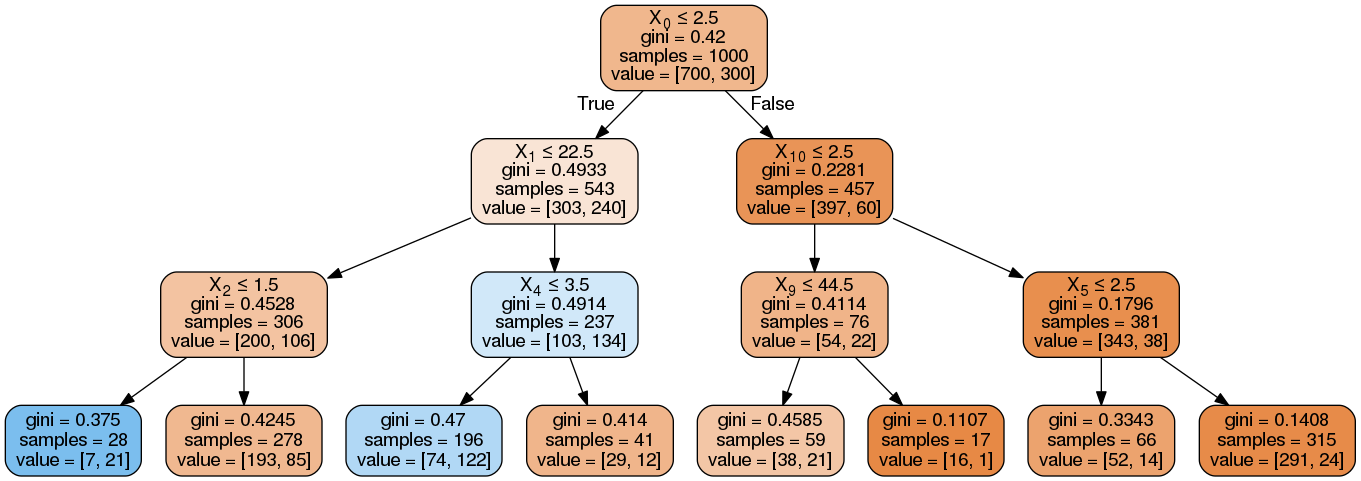

In [61]:
model = DTC(max_depth = 3)
model.fit(data, target)

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2)

dot_data = tree.export_graphviz(model, out_file = "result_tree.out", filled = True, rounded = True, special_characters = True)
graph = pydotplus.graphviz.graph_from_dot_file("result_tree.out")

Image(graph.create_png())

In [76]:
N = 20

accuracy = []
for i in range(1, N):
    model = DTC(max_depth = i)
    model.fit(train_data, train_target)
    train_prediction = model.predict(train_data)
    accuracy.append(accuracy_score(train_target, train_prediction))

In [77]:
cross_val = []
for i in range(1, N):
    val = nmp.mean(cross_val_score(DTC(max_depth = i), data, target, cv = 10, scoring = 'accuracy'))
    cross_val.append(val)

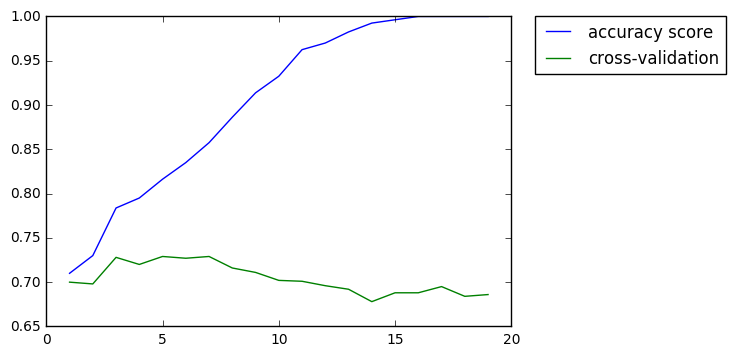

In [78]:
axis_x = nmp.arange(1, N, 1)

plt.plot(axis_x, accuracy, label = "accuracy score")
plt.plot(axis_x, cross_val, label = "cross-validation")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()    